In [1]:
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("Housing.csv")

In [3]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
df.shape

(545, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [7]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


### Feature encoding

In [8]:
a=["mainroad","guestroom","basement","hotwaterheating","airconditioning","prefarea"]

In [9]:
def binary(x):
    return x.map({"yes":1,"no":0})
df[a]=df[a].apply(binary)

In [10]:
status=pd.get_dummies(df.furnishingstatus,drop_first=True)
df=pd.concat([df,status],axis=1)

In [11]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished,0,0


In [12]:
df=df.drop("furnishingstatus",axis=1)

In [13]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0


### feature scaling

In [14]:
num_var=["price","area","bedrooms","bathrooms","stories","parking"]

In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
df[num_var]=scaler.fit_transform(df[num_var])

In [17]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,1.000000,0.396564,0.6,0.333333,0.666667,1,0,0,0,1,0.666667,1,0,0
1,0.909091,0.502405,0.6,1.000000,1.000000,1,0,0,0,1,1.000000,0,0,0
2,0.909091,0.571134,0.4,0.333333,0.333333,1,0,1,0,0,0.666667,1,1,0
3,0.906061,0.402062,0.6,0.333333,0.333333,1,0,1,0,1,1.000000,1,0,0
4,0.836364,0.396564,0.6,0.000000,0.333333,1,1,1,0,1,0.666667,0,0,0


### split the data

In [18]:
x=df.drop("price",axis=1)
y=df["price"]

In [19]:
from sklearn.model_selection import train_test_split

In [47]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,random_state=42)

### statistical model

In [21]:
import statsmodels.api as sm
x_train_lm=sm.add_constant(x_train)
lr=sm.OLS(y_train,x_train_lm).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.682
Method:                 Least Squares   F-statistic:                     63.79
Date:                Wed, 28 Apr 2021   Prob (F-statistic):           1.00e-85
Time:                        23:04:30   Log-Likelihood:                 398.59
No. Observations:                 381   AIC:                            -769.2
Df Residuals:                     367   BIC:                            -714.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0326      0.021      1.587      0.113      -0.008       0.073
area                0.3191      0.034      9.351      0.000       0.252       0.386
bedrooms            0.0350      0.035      0.998      0.319      -0.034       0.104
bathrooms           0.2895      0.032      9.031      0.000       0.227       0.353
stories             0.1084      0.019      5.599      0.000       0.070       0.146
mainroad            0.0353      0.014      2.517      0.012       0.008       0.063
guestroom           0.0239      0.013      1.858      0.064      -0.001       0.049
basement            0.0418      0.011      3.794      0.000       0.020       0.063
hotwaterheating     0.0534      0.020      2.619      0.009       0.013       0.093
airconditioning     0.0594      0.011      5.502      0.000       0.038       0.081
parking             0.0787      0.017      4.547      0.000       0.045       0.113
prefarea            0.0441      0.011      3.925      0.000       0.022       0.066
semi-furnished     -0.0105      0.011     -0.941      0.347      -0.033       0.011
unfurnished        -0.0339      0.012     -2.741      0.006      -0.058      -0.010
==============================================================================
Omnibus:                       61.032   Durbin-Watson:                   1.895
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              144.413
Skew:                           0.805   Prob(JB):                     4.38e-32
Kurtosis:                       5.550   Cond. No.                         15.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Linear model creation


In [23]:
from sklearn.linear_model import LinearRegression

In [24]:
linear=LinearRegression()

In [48]:
linear=linear.fit(x_train,y_train)

### Model Evalution and metrics

In [49]:
y_train_pred=linear.predict(x_train)
y_test_pred=linear.predict(x_test)

In [27]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error,adjusted_mutual_info_score

#### train data evaluation

In [55]:
lr=sm.OLS(y_train,x_train_lm).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.682
Method:                 Least Squares   F-statistic:                     63.79
Date:                Wed, 28 Apr 2021   Prob (F-statistic):           1.00e-85
Time:                        23:40:12   Log-Likelihood:                 398.59
No. Observations:                 381   AIC:                            -769.2
Df Residuals:                     367   BIC:                            -714.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0326      0.021      1.587      0.113      -0.008       0.073
area                0.3191      0.034      9.351      0.000       0.252       0.386
bedrooms            0.0350      0.035      0.998      0.319      -0.034       0.104
bathrooms           0.2895      0.032      9.031      0.000       0.227       0.353
stories             0.1084      0.019      5.599      0.000       0.070       0.146
mainroad            0.0353      0.014      2.517      0.012       0.008       0.063
guestroom           0.0239      0.013      1.858      0.064      -0.001       0.049
basement            0.0418      0.011      3.794      0.000       0.020       0.063
hotwaterheating     0.0534      0.020      2.619      0.009       0.013       0.093
airconditioning     0.0594      0.011      5.502      0.000       0.038       0.081
parking             0.0787      0.017      4.547      0.000       0.045       0.113
prefarea            0.0441      0.011      3.925      0.000       0.022       0.066
semi-furnished     -0.0105      0.011     -0.941      0.347      -0.033       0.011
unfurnished        -0.0339      0.012     -2.741      0.006      -0.058      -0.010
==============================================================================
Omnibus:                       61.032   Durbin-Watson:                   1.895
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              144.413
Skew:                           0.805   Prob(JB):                     4.38e-32
Kurtosis:                       5.550   Cond. No.                         15.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [54]:
print("TRAIN DATA")
print("r2 score:",r2_score(y_train,y_train_pred))
print("mean squared error :",mean_squared_error(y_train,y_train_pred))
print("root mean squared error:",np.sqrt(mean_squared_error(y_train,y_train_pred)))
print("mean absolute error:",mean_absolute_error(y_train,y_train_pred))


TRAIN DATA
r2 score: 0.6931989807027314
mean squared error : 0.007225017370951516
root mean squared error: 0.08500010218200632
mean absolute error: 0.06235889166402245


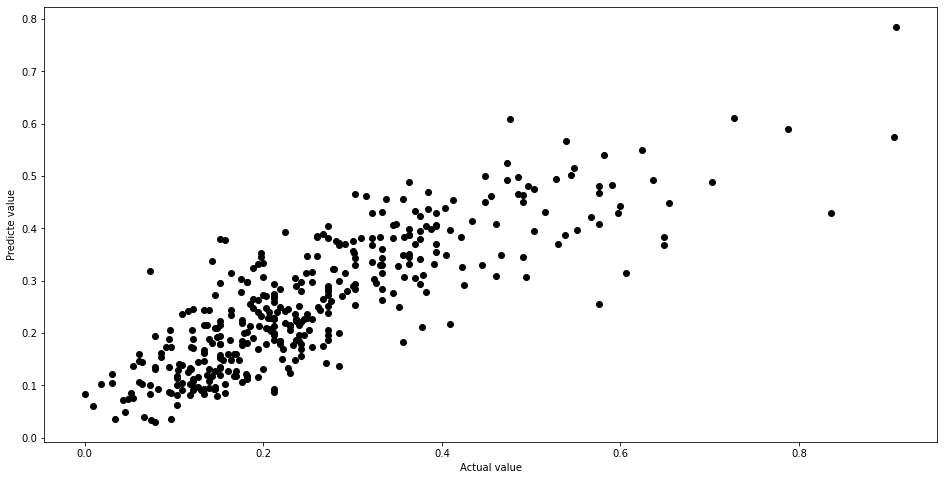

In [63]:
plt.figure(figsize=(16, 8))
plt.scatter(y_train, y_train_pred, c='black')

plt.xlabel("Actual value")
plt.ylabel("Predicte value")
plt.show()


#### test data evaluation

In [60]:
x_test_lm=sm.add_constant(x_test)
lr=sm.OLS(y_test,x_test_lm).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.699
Model:                            OLS   Adj. R-squared:                  0.673
Method:                 Least Squares   F-statistic:                     26.78
Date:                Wed, 28 Apr 2021   Prob (F-statistic):           1.04e-32
Time:                        23:43:37   Log-Likelihood:                 147.25
No. Observations:                 164   AIC:                            -266.5
Df Residuals:                     150   BIC:                            -223.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.0011      0.038     -0.029      0.977      -0.076       0.073
area                0.2716      0.064      4.219      0.000       0.144       0.399
bedrooms            0.0834      0.066      1.260      0.210      -0.047       0.214
bathrooms           0.1794      0.050      3.555      0.001       0.080       0.279
stories             0.1479      0.033      4.474      0.000       0.083       0.213
mainroad            0.0375      0.024      1.536      0.127      -0.011       0.086
guestroom           0.0358      0.024      1.481      0.141      -0.012       0.084
basement            0.0066      0.019      0.349      0.727      -0.031       0.044
hotwaterheating     0.1547      0.049      3.147      0.002       0.058       0.252
airconditioning     0.1037      0.019      5.500      0.000       0.066       0.141
parking             0.0758      0.031      2.455      0.015       0.015       0.137
prefarea            0.0859      0.021      4.035      0.000       0.044       0.128
semi-furnished      0.0043      0.022      0.198      0.843      -0.039       0.047
unfurnished        -0.0442      0.022     -1.971      0.051      -0.088       0.000
==============================================================================
Omnibus:                       46.719   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              132.286
Skew:                           1.134   Prob(JB):                     1.88e-29
Kurtosis:                       6.770   Cond. No.                         15.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [57]:
print("TEST DATA")
print("r2 score:",r2_score(y_test,y_test_pred))
print("mean squared error :",mean_squared_error(y_test,y_test_pred))
print("root mean squared error:",np.sqrt(mean_squared_error(y_test,y_test_pred)))
print("mean absolute error:",mean_absolute_error(y_test,y_test_pred))


TEST DATA
r2 score: 0.6463350878895879
mean squared error : 0.011416723595894306
root mean squared error: 0.10684906923269995
mean absolute error: 0.07968770041219006


In [ ]:
plt.figure(figsize=(16, 8))
plt.scatter(y_train, y_pred, c='black')

plt.xlabel("Actual value")
plt.ylabel("Predicte value")
plt.show()
